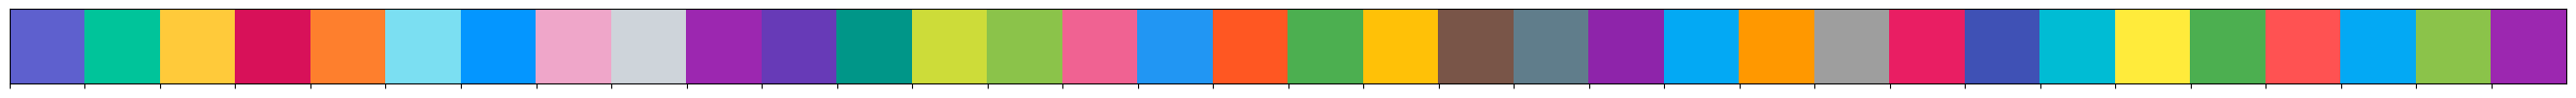

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base as base
import functions as func
from datetime import datetime
import matplotlib
import os
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

In [ ]:
# load umap 
save_to = "mouse_chip19894"
figure_save_to = f"{save_to}/connect_map"
file_save_to = f"{save_to}/files"
umap_file = "umap_with_recs_res1.5_loc"
umap_df = pd.read_csv(f"{save_to}/files/{umap_file}.csv")
unmap_file_path = f"{save_to}/files/{umap_file}_added.csv"
umap_df_added = func.load_umap_df(unmap_file_path)

In [3]:
umap_df_added

,x,y,waveform,color,neuron_index,dataset,pos_x,pos_y,timestamp,unit_id,neighbor_waveforms,neighbor_positions
0,-1.551959,9.857347,"[-0.00944094122, -0.00130065723, 0.00988066528...",0,0,2023-09-16-T171332-chip19894_right_acqm.zip,2765.0,822.5,2023-09-16-T171332,0.0,"[-0.16430141031742096, -0.022635435685515404, ...","[2765.0, 822.5, 2765.0, 805.0, 2782.5, 822.5, ..."
1,0.086262,8.830884,"[0.03266934, 0.03523008, 0.03761053, 0.0389171...",4,1,2023-09-16-T171332-chip19894_right_acqm.zip,2695.0,770.0,2023-09-16-T171332,1.0,"[0.6487308740615845, 0.699580729007721, 0.7468...","[2695.0, 770.0, 2730.0, 787.5, 2730.0, 770.0, ..."
2,0.677832,7.537619,"[0.0365066498, 0.0381159504, 0.0401325954, 0.0...",4,2,2023-09-16-T171332-chip19894_right_acqm.zip,2695.0,770.0,2023-09-16-T171332,3.0,"[0.708060085773468, 0.7392730712890625, 0.7783...","[2695.0, 770.0, 2730.0, 787.5, 2730.0, 770.0, ..."
3,-0.184029,9.457567,"[0.03386663, 0.03797821, 0.03908553, 0.0393334...",4,3,2023-09-16-T171332-chip19894_right_acqm.zip,2747.5,840.0,2023-09-16-T171332,4.0,"[0.5281612873077393, 0.5922825932502747, 0.609...","[2747.5, 840.0, 2765.0, 822.5, 2730.0, 840.0, ..."
4,0.496969,8.029844,"[0.03390579, 0.03538539, 0.03680328, 0.0383052...",4,4,2023-09-16-T171332-chip19894_right_acqm.zip,2695.0,770.0,2023-09-16-T171332,5.0,"[0.6721569299697876, 0.7014887928962708, 0.729...","[2695.0, 770.0, 2730.0, 787.5, 2730.0, 770.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3522,8.807777,8.550941,"[0.04852117, 0.05342753, 0.05919553, 0.0641206...",16,3609,2023-09-23-T140359-chip19894_right_acqm.zip,2555.0,787.5,2023-09-23-T140359,19.0,"[1.4446239471435547, 1.5907013416290283, 1.762...","[2555.0, 787.5, 2537.5, 770.0, 2555.0, 770.0, ..."
3523,11.186492,11.076571,"[0.05827522, 0.06225828, 0.06699329, 0.0740188...",17,3610,2023-09-23-T140359-chip19894_right_acqm.zip,2100.0,840.0,2023-09-23-T140359,20.0,"[1.169891595840454, 1.2498526573181152, 1.3449...","[2100.0, 840.0, 2117.5, 857.5, 2082.5, 840.0, ..."
3524,10.398659,10.836109,"[0.0372987008, 0.0412212393, 0.0440538574, 0.0...",18,3611,2023-09-23-T140359-chip19894_right_acqm.zip,2170.0,910.0,2023-09-23-T140359,21.0,"[0.44685423374176025, 0.49384790658950806, 0.5...","[2170.0, 910.0, 2152.5, 910.0, 2152.5, 892.5, ..."
3525,12.710835,2.179244,"[0.0411179529, 0.053243622, 0.0601711814, 0.05...",7,3612,2023-09-23-T140359-chip19894_right_acqm.zip,2432.5,1190.0,2023-09-23-T140359,22.0,"[0.3737529218196869, 0.4839725196361542, 0.546...","[2432.5, 1190.0, 2397.5, 1172.5, 2415.0, 1207...."


In [4]:
# df["channel_x"] = df["x"].astype(float)
# df["channel_y"] = df["y"].astype(float)
# #convert timestamp from string to datetime and float
umap_df_added['timestamp'] = pd.to_datetime(umap_df_added['timestamp'])
# #convert timestamp from string to datetime and float
# umap_df_added['timestamp'] = umap_df_added['timestamp'].astype('int64') / 1e6 #convert to milliseconds

# #Convert waveform from string to numpy array
# df['waveform'] = df['waveform'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
umap_df_added['timestamp']

0      2023-09-16 17:13:32
1      2023-09-16 17:13:32
2      2023-09-16 17:13:32
3      2023-09-16 17:13:32
4      2023-09-16 17:13:32
               ...        
3522   2023-09-23 14:03:59
3523   2023-09-23 14:03:59
3524   2023-09-23 14:03:59
3525   2023-09-23 14:03:59
3526   2023-09-23 14:03:59
Name: timestamp, Length: 3527, dtype: datetime64[ns]

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from fastdtw import fastdtw
import networkx as nx
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from datetime import timedelta

class NeuronTracker:
    def __init__(
        self,
        spatial_threshold: float = 17.5*np.sqrt(2),
        waveform_threshold: float = 0.9,
        time_window: str = "2:30:00",
        dtw_threshold: float = 0.7,
        use_cluster=True,
    ):
        """
        Initialize the NeuronTracker with tracking parameters.
        
        Args:
            spatial_threshold: Maximum allowed distance between channels
            waveform_threshold: Minimum cosine similarity between waveforms
            time_window: Maximum allowed time difference (ms)
            dtw_threshold: Minimum average DTW similarity
        """
        self.spatial_threshold = spatial_threshold
        self.waveform_threshold = waveform_threshold
        self.time_window = self.parse_time(time_window)
        self.dtw_threshold = dtw_threshold
        self.use_cluster = use_cluster
        self.graph = nx.Graph()
        
    def parse_time(self, threshold_str):
        # Split the string into hours, minutes, and seconds
        hours, minutes, seconds = map(int, threshold_str.split(":"))
        return timedelta(hours=hours, minutes=minutes, seconds=seconds)
    
    def compute_spatial_weight(self, pos1: Tuple[float, float], pos2: Tuple[float, float]) -> float:
        """Calculate spatial proximity weight between two positions."""
        distance = euclidean(pos1, pos2)
        if distance > self.spatial_threshold:
            return -1
        # return 1.0 / (1.0 + distance)
        return 1.0 - distance / self.spatial_threshold   # make distance weight between 0 and 1
    
    def compute_waveform_weight(self, wf1: np.ndarray, wf2: np.ndarray) -> float:
        """Calculate waveform similarity weight between two waveforms."""
        # similarity = 1 - cosine(wf1, wf2)  # Convert distance to similarity
        similarity = cosine_similarity(wf1.reshape(1, -1), wf2.reshape(1, -1))[0][0]
        if similarity < self.waveform_threshold:
            return -1
        # return similarity
        return (similarity - 0.9)/0.1 # make similarity weight between 0 and 1
    
    def construct_graph(self, data: pd.DataFrame) -> None:
        """
        Construct weighted graph from neuron data.
        
        Args:
            data: DataFrame with columns [pos_x, pos_y, waveform, timestamp]
        """
        # Add nodes - using DataFrame index as node identifier
        node_counter = 0
        for idx, row in data.iterrows():
            self.graph.add_node(
                idx,  # Using index as node identifier
                pos=(row['pos_x'], row['pos_y']),
                # waveform=row['waveform'],
                waveform = row["neighbor_waveforms"],
                timestamp=row['timestamp'],
                cluster=row['color'],
            )
            node_counter += 1
        # print(f"Added {node_counter} nodes to the graph")
        
        # Add edges
        nodes = list(self.graph.nodes(data=True))
        for i, (node1, data1) in enumerate(nodes):
            print(f"Processing{i}, {node1}")
            for node2, data2 in nodes[i+1:]:
                if self.use_cluster:
                    if data1["cluster"] != data2["cluster"]:
                        # print(f"Skipping edge between {node1} and {node2} due different cluster {data1['cluster']} and {data2['cluster']}")
                        continue
                # Check time window
                if data2['timestamp'] == data1['timestamp']:
                    # print(f"Skipping edge between {node1} and {node2} due to same timestamp {data1['timestamp']}")
                    continue
                # time_diff = abs(data2['timestamp'] - data1['timestamp'])
                time_diff = data2['timestamp'] - data1['timestamp']
                if time_diff > self.time_window:
                    # print(f"Skipping edge between {node1} and {node2} due to larger time window {time_diff}")
                    continue
                
                # Compute weights
                spatial_weight = self.compute_spatial_weight(
                    data1['pos'], data2['pos']
                )
                if spatial_weight == -1:

                    continue
                # print(f"spatial_weight={spatial_weight} for {data1['pos']} and {data2['pos']}, cluster {data1['cluster']}")
                #print(data1['waveform'])
                #print(type(data1['waveform']))
                waveform_weight = self.compute_waveform_weight(
                    data1['waveform'], data2['waveform']
                )
                if waveform_weight == -1:
                    continue
                
                # Add edge if both weights are non-zero
                # if spatial_weight > -1 and waveform_weight > -1:
                combined_weight = 0.5 * spatial_weight + 0.5 * waveform_weight
                self.graph.add_edge(node1, node2, weight=combined_weight)
                print(f"Added edge between {node1} and {node2} with weight {combined_weight:.3f}")
    
    def compute_dtw_similarity(self, waveforms: List[np.ndarray]) -> float:
        """Compute average DTW similarity for a group of waveforms."""
        n_waveforms = len(waveforms)
        if n_waveforms < 2:
            return 1.0
        
        total_similarity = 0.0
        comparisons = 0
        
        for i in range(n_waveforms):
            for j in range(i + 1, n_waveforms):
                distance, _ = fastdtw(waveforms[i], waveforms[j])
                similarity = 1.0 / (1.0 + distance)
                total_similarity += similarity
                comparisons += 1
        
        return total_similarity / comparisons
    
    def find_trackable_units(self, duration=3, min_weight=0.5) -> List[Dict]:
        """
        Extract and filter trackable units from the graph.
        
        Returns:
            List of dictionaries containing unit information
        """
        trackable_units = []
        
        # Find connected components
        components = list(nx.connected_components(self.graph))
        
        for component in components:
            # Extract component data
            component_nodes = list(component)
            if len(component_nodes) < duration:
                continue
            waveforms = [self.graph.nodes[node]['waveform'] for node in component_nodes]
            timestamps = [self.graph.nodes[node]['timestamp'] for node in component_nodes]
            positions = [self.graph.nodes[node]['pos'] for node in component_nodes]
            
            # filter by weight 
            # Get edges for the current component
            component_edges = self.graph.subgraph(component).edges(data=True)
            
            # Extract weights for edges in the component
            weights = [data['weight'] for _, _, data in component_edges]
            if np.mean(weights) <  min_weight:
                continue

            # Compute DTW similarity
            dtw_similarity = self.compute_dtw_similarity(waveforms)
            
            # Filter by DTW threshold
            if dtw_similarity >= self.dtw_threshold:
                trackable_units.append({
                    'indices': component_nodes,  # Now using indices instead of unit_ids to avoid conflicts with spike sorting 
                    'positions': positions,
                    'avg_dtw_similarity': dtw_similarity,
                    'start_time': min(timestamps),
                    'end_time': max(timestamps),
                    'timestamps': timestamps,
                })
        
        return trackable_units
    


In [28]:
def visualize_tracking(input_graph, node_size=5, save_path: str=None, show_ticks=False) -> None:
    """
    Visualize spatial tracking of neurons across time.
    
    Args:
        save_path: Optional path to save the visualization
    """
    fig, ax = plt.subplots(figsize=(6, 5))

    pos = nx.spring_layout(input_graph)


    # filter 

    # Draw nodes
    node_colors = [input_graph.nodes[node]['timestamp'].timestamp() for node in input_graph.nodes]
    nodes = nx.draw_networkx_nodes(
        input_graph, 
        pos,
        node_color=node_colors,
        node_size=node_size,
        cmap=plt.cm.viridis,
        ax=ax,
        # alpha=0.7
    )
    
    # Draw edges
    edges = input_graph.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    print(f"wights, {min(weights)}, {max(weights)}")
    edge_collection = nx.draw_networkx_edges(
        input_graph, 
        pos,
        edge_color='r',
        # edge_cmap=plt.cm.autumn,
        # edge_vmin=min(weights),  # Ensure correct normalization for the colorbar
        # edge_vmax=max(weights),
        width=weights*node_size,
        ax=ax
    )
    

    # ax.add_collection(edge_collection)
    # edge_collection.set_zorder(2)

    # Enable ticks
    if show_ticks:
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    # Create colorbar for nodes
    sm_nodes = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm_nodes.set_array([])
    cbar_nodes = plt.colorbar(sm_nodes, ax=ax, label='Node Timestamp')
    start_time = min(node_colors)
    days = [(timestamp - start_time) // (24 * 3600) + 1 for timestamp in node_colors]  # Calculate day numbers
    unique_days = sorted(set(days))  # Unique day labels
    tick_positions = [start_time + (day - 1) * 24 * 3600 for day in unique_days]  # Tick positions in seconds
    tick_labels = [f"Day {int(day)}" for day in unique_days]  # Label as "Day 1", "Day 2", ...

    cbar_nodes.set_ticks(tick_positions)
    cbar_nodes.set_ticklabels(tick_labels)

    # # Create colorbar for edges
    # sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.autumn, norm=plt.Normalize(vmin=0, vmax=1))
    # sm_edges.set_array([])
    # cbar_edges = plt.colorbar(sm_edges, ax=ax, label='Edge Weight')

    
    ax.set_title('Neuron Tracking Visualization')
    
    if save_path:
        plt.savefig(f"{save_path}.png", dpi=300)
        plt.savefig(f"{save_path}.pdf", dpi=300)
    # plt.close()



In [29]:
def visualize_trackable_units(input_graph, trackable_units, node_size=5, show_ticks=False,save_path: str = None) -> None:
    """
    Visualize spatial tracking of trackable neurons across time.
    
    Args:
        input_graph: The complete input graph.
        trackable_units: List of trackable units (output of `find_trackable_units`).
        node_size: Size of the nodes in the plot.
        save_path: Optional path to save the visualization.
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Prepare the subgraph for trackable units
    trackable_nodes = set()
    trackable_edges = []
    
    # Aggregate nodes and edges from all trackable units
    for unit in trackable_units:
        trackable_nodes.update(unit['indices'])
        for i in range(len(unit['indices'])):
            for j in range(i + 1, len(unit['indices'])):
                if input_graph.has_edge(unit['indices'][i], unit['indices'][j]):
                    trackable_edges.append((unit['indices'][i], unit['indices'][j]))
    
    # Create a subgraph for trackable units
    subgraph = input_graph.subgraph(trackable_nodes)

    # Extract node attributes for trackable units
    node_colors = [input_graph.nodes[node]['timestamp'].timestamp() for node in trackable_nodes]
    positions = nx.spring_layout(subgraph)  # Calculate positions for the subgraph

    # Draw nodes
    nodes = nx.draw_networkx_nodes(
        subgraph,
        positions,
        node_color=node_colors,
        node_size=node_size,
        cmap=plt.cm.viridis,
        ax=ax
    )

    # Extract edge attributes for trackable units
    edge_weights = [input_graph[u][v]['weight'] for u, v in trackable_edges]

    # Draw edges
    edge_collection = nx.draw_networkx_edges(
        subgraph,
        positions,
        edge_color='r',
        # edge_cmap=plt.cm.Reds,
        # edge_vmin=min(edge_weights) if edge_weights else 0,
        # edge_vmax=max(edge_weights) if edge_weights else 1,
        width=edge_weights*node_size,
        ax=ax
    )

    # Add edge collection manually to ensure edges appear on top
    ax.add_collection(edge_collection)

    # Enable ticks
    if show_ticks:
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
    # Create colorbar for nodes
    sm_nodes = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm_nodes.set_array([])
    cbar_nodes = plt.colorbar(sm_nodes, ax=ax, label='Node Timestamp')

    # Replace colorbar ticks with "Day 1", "Day 2", ...
    start_time = min(node_colors)
    days = [(timestamp - start_time) // (24 * 3600) + 1 for timestamp in node_colors]  # Calculate day numbers
    unique_days = sorted(set(days))  # Unique day labels
    tick_positions = [start_time + (day - 1) * 24 * 3600 for day in unique_days]  # Tick positions in seconds
    tick_labels = [f"Day {int(day)}" for day in unique_days]  # Label as "Day 1", "Day 2", ...

    cbar_nodes.set_ticks(tick_positions)
    cbar_nodes.set_ticklabels(tick_labels)

    # # Create colorbar for edges
    # if edge_weights:
    #     sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
    #     sm_edges.set_array([])
    #     cbar_edges = plt.colorbar(sm_edges, ax=ax, label='Edge Weight')

    ax.set_title('Trackable Units Visualization')
    
    if save_path:
        plt.savefig(f"{save_path}.png", dpi=300)
        plt.savefig(f"{save_path}.pdf", dpi=300)
    plt.show()


In [30]:
17.5*np.sqrt(2)

24.748737341529164

In [31]:
# Create sample data
np.random.seed(42)
n_samples = 100
time_range = np.linspace(0, 1000, n_samples)

data = umap_df_added.copy()

# Initialize and run tracker
tracker = NeuronTracker(
    spatial_threshold=17.5*np.sqrt(2),
    waveform_threshold=0.9,
    time_window="48:00:00",
    dtw_threshold=0   
)

# Process data
tracker.construct_graph(data)
trackable_units = tracker.find_trackable_units(duration=10, min_weight=0.5)

# Print results
print(f"Found {len(trackable_units)} trackable units:")
for unit in trackable_units:
    print(f"\nIndices: {unit['indices']}")
    print(f"DTW Similarity: {unit['avg_dtw_similarity']:.3f}")
    print(f"Time Range: {unit['start_time']} - {unit['end_time']}")



Processing0, 0
Processing1, 1
Added edge between 1 and 805 with weight 0.147
Processing2, 2
Added edge between 2 and 483 with weight 0.334
Added edge between 2 and 619 with weight 0.160
Processing3, 3
Added edge between 3 and 77 with weight 0.644
Added edge between 3 and 245 with weight 0.354
Added edge between 3 and 319 with weight 0.267
Added edge between 3 and 369 with weight 0.255
Added edge between 3 and 392 with weight 0.307
Added edge between 3 and 584 with weight 0.318
Added edge between 3 and 618 with weight 0.255
Added edge between 3 and 920 with weight 0.195
Processing4, 4
Added edge between 4 and 101 with weight 0.549
Added edge between 4 and 113 with weight 0.513
Added edge between 4 and 124 with weight 0.512
Added edge between 4 and 125 with weight 0.512
Added edge between 4 and 492 with weight 0.149
Added edge between 4 and 524 with weight 0.368
Processing5, 5
Added edge between 5 and 483 with weight 0.300
Processing6, 6
Processing7, 7
Processing8, 8
Processing9, 9
Added

In [32]:
edges = tracker.graph.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
print(f"Min weight: {min(weights)}, Max weight: {max(weights)}")

Min weight: 0.00012851265384417054, Max weight: 0.9962130231653317


In [33]:
# plt.hist(weights)

wights, 0.00012851265384417054, 0.9962130231653317


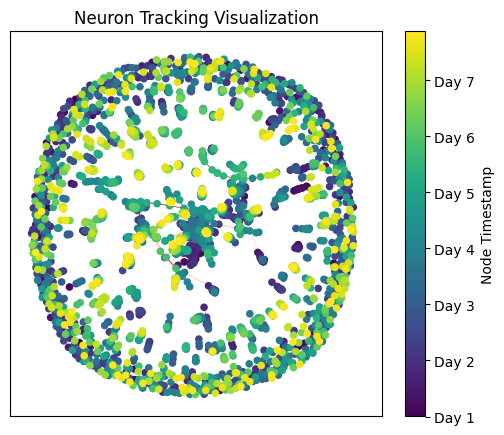

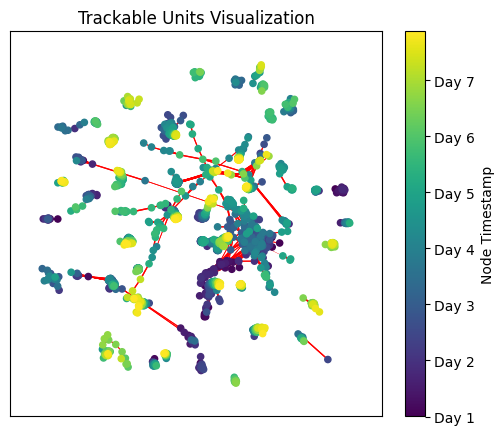

In [34]:
# Visualize results
visualize_tracking(input_graph=tracker.graph, node_size=20, save_path="neuron_tracking_48h_10points_noabs")
visualize_trackable_units(input_graph=tracker.graph, trackable_units=trackable_units, node_size=20, save_path="trackable_units_graph_48h_10points_noabs")

In [35]:
# for trackable units, verify that they are in the same waveform cluster
print(f"Found {len(trackable_units)} trackable units:")
# sort trackable units by the duration they are active
# trackable_units = sorted(trackable_units, key=lambda x: x['end_time'] - x['start_time'], reverse=True)
# trackable_units
# trackable_1 = trackable_units[0]

Found 46 trackable units:


In [36]:
# trackable_units

In [37]:
for x in range(len(trackable_units)):
    print(f"Processing trackable_units id {x}")
    trackable = trackable_units[x]
    # if len(trackable["indices"]) < 10:
    #     continue
    cluster_ids = []
    chn_pos = []
    timestamps = []
    # plot channel to time 
    fig, axs = plt.subplots(1, 1, figsize=(10, 3))
    for i in range(len(trackable["indices"])):
        idx = trackable["indices"][i]
        print(idx)
    # for idx in trackable["indices"]: 
        waveform_cluster = umap_df_added.loc[idx, "color"]
        pos = str(tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values))
        track_pos = trackable["positions"][i]
        print(f"track_pos={track_pos}, pos={pos}")
        
        timestamp = umap_df_added.iloc[idx]["timestamp"]
        ts = trackable["timestamps"][i]
        print(f"timestamp={timestamp}, ts={ts}")
        # convert timestamp string to datetime object
        # timestamp = datetime.strptime(timestamp, "%Y-%m-%d-T%H%M%S")
        # for i in range(channels.shape[0]):
        timestamps.append(timestamp)
        cluster_ids.append(waveform_cluster)
        chn_pos.append(pos)

    all_colors = [base.CUSTOM_PAL_SORT_3[c] for c in cluster_ids]
    axs.scatter(timestamps, chn_pos, c=all_colors, s=5, alpha=0.7)
    axs.set_title(f"Trackable Unit {x}")
    axs.set_xlabel("Time")
    axs.set_ylabel("Channel Position")
    
    plt.savefig(f"{figure_save_to}/trackable_units/trackable_unit_{x}_{all_colors[0]}_noabs_48h.png", dpi=300)
    plt.savefig(f"{figure_save_to}/trackable_units/trackable_unit_{x}_{all_colors[0]}_noabs_48h.png", dpi=300)
    plt.close()

Processing trackable_units id 0
1024
track_pos=(2712.5, 770.0), pos=(2712.5, 770.0)
timestamp=2023-09-18 21:00:00, ts=2023-09-18 21:00:00
1
track_pos=(2695.0, 770.0), pos=(2695.0, 770.0)
timestamp=2023-09-16 17:13:32, ts=2023-09-16 17:13:32
2
track_pos=(2695.0, 770.0), pos=(2695.0, 770.0)
timestamp=2023-09-16 17:13:32, ts=2023-09-16 17:13:32
1539
track_pos=(2712.5, 770.0), pos=(2712.5, 770.0)
timestamp=2023-09-19 18:00:00, ts=2023-09-19 18:00:00
4
track_pos=(2695.0, 770.0), pos=(2695.0, 770.0)
timestamp=2023-09-16 17:13:32, ts=2023-09-16 17:13:32
5
track_pos=(2695.0, 770.0), pos=(2695.0, 770.0)
timestamp=2023-09-16 17:13:32, ts=2023-09-16 17:13:32
515
track_pos=(2712.5, 770.0), pos=(2712.5, 770.0)
timestamp=2023-09-18 01:00:01, ts=2023-09-18 01:00:01
1032
track_pos=(2712.5, 770.0), pos=(2712.5, 770.0)
timestamp=2023-09-18 21:00:00, ts=2023-09-18 21:00:00
524
track_pos=(2712.5, 770.0), pos=(2712.5, 770.0)
timestamp=2023-09-18 01:00:01, ts=2023-09-18 01:00:01
1044
track_pos=(2712.5, 787.

In [302]:
# save trackable units to a numpy file
np.save(f"{file_save_to}/trackable_units_noabs_48h.npy", trackable_units) 


[(2047.5, 770.0), (2047.5, 805.0), (2047.5, 822.5), (2047.5, 840.0), (2065.0, 770.0), (2065.0, 840.0), (2065.0, 857.5), (2082.5, 857.5), (2100.0, 840.0), (2100.0, 857.5), (2100.0, 875.0), (2100.0, 910.0), (2117.5, 700.0), (2117.5, 717.5), (2117.5, 735.0), (2117.5, 840.0), (2117.5, 857.5), (2117.5, 910.0), (2117.5, 927.5), (2135.0, 700.0), (2135.0, 735.0), (2135.0, 840.0), (2135.0, 927.5), (2152.5, 700.0), (2152.5, 892.5), (2152.5, 910.0), (2170.0, 700.0), (2170.0, 910.0), (2187.5, 892.5), (2187.5, 910.0), (2222.5, 892.5), (2257.5, 735.0), (2327.5, 682.5), (2327.5, 700.0), (2327.5, 1155.0), (2380.0, 717.5), (2380.0, 875.0), (2380.0, 892.5), (2397.5, 682.5), (2397.5, 892.5), (2467.5, 770.0), (2502.5, 735.0), (2555.0, 787.5), (2572.5, 787.5), (2642.5, 752.5), (2642.5, 822.5), (2642.5, 1137.5), (2660.0, 1137.5), (2677.5, 1155.0), (2695.0, 770.0), (2695.0, 1137.5), (2712.5, 770.0), (2712.5, 787.5), (2730.0, 787.5), (2730.0, 840.0), (2747.5, 770.0), (2747.5, 787.5), (2747.5, 822.5), (2747.5,

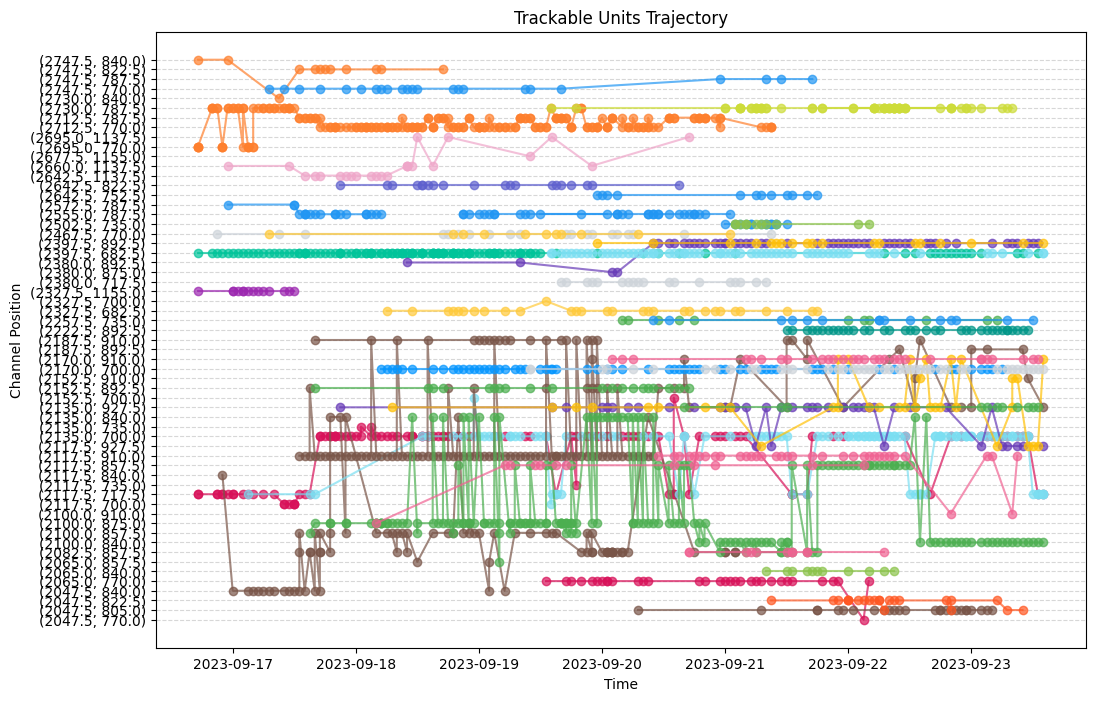

In [86]:
# plot the trackable units in the same figure as x axis is time and y axis is channel position, channel position is sorted by x then y
all_channel_pos = []
all_cluster_color= []
all_timestamps = []
# plot channel to time 

# find all the channel positions, number and sort them 
for x in range(len(trackable_units)):
    trackable = trackable_units[x]
    for idx in trackable["indices"]: 
        pos = str(tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values))
        all_channel_pos.append(pos)

# sort the channel positions by x then y
# take the unique channel positions
all_channel_pos = list(set(all_channel_pos))
all_channel_pos = [eval(pos) for pos in all_channel_pos]
all_channel_pos = sorted(all_channel_pos, key=lambda pos: (pos[0], pos[1]))
chn_pos_idx = np.arange(len(all_channel_pos))
print(all_channel_pos)
chn_pos_dict = {pos: idx for idx, pos in zip(chn_pos_idx, all_channel_pos)}


# plot the tracakble units trejactory 
fig, axs = plt.subplots(1, 1, figsize=(12, 8))
for x in range(len(trackable_units)):
    trackable = trackable_units[x]
    # if len(trackable["indices"]) < 10:
    #     continue
    cluster_ids = []
    chn_pos = []
    timestamps = []


    for idx in trackable["indices"]: 
        waveform_cluster = umap_df_added.loc[idx, "color"]
        pos = str(tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values))
        pos_id = chn_pos_dict[eval(pos)]
        timestamp = umap_df_added.iloc[idx]["timestamp"]
        # convert timestamp string to datetime object
        # timestamp = datetime.strptime(timestamp, "%Y-%m-%d-T%H%M%S")
        # for i in range(channels.shape[0]):
        timestamps.append(timestamp)
        cluster_ids.append(base.CUSTOM_PAL_SORT_3[waveform_cluster])
        chn_pos.append(pos_id)
        # all_channel_pos.append(pos)
        # all_cluster_color.append(base.CUSTOM_PAL_SORT_3[waveform_cluster])
        # all_timestamps.append(timestamp)
    # sort cluster_ids, chn_pos by timestamps
    timestamps, cluster_ids, chn_pos = zip(*sorted(zip(timestamps, cluster_ids, chn_pos)))
    axs.plot(timestamps, chn_pos, c=cluster_ids[0], marker='o', linestyle='-', alpha=0.7)

axs.grid(axis='y', linestyle='--', alpha=0.5)

axs.set_title(f"Trackable Units Trajectory")
axs.set_xlabel("Time")
# replace the channel position with the actual channel position
chn_pos_labels = [pos for pos in all_channel_pos]
axs.set_ylabel("Channel Position")
axs.set_yticks(chn_pos_idx)
axs.set_yticklabels(chn_pos_labels)

plt.savefig(f"{figure_save_to}/figure_4/trackable_unit_trajectory.png", dpi=300)
plt.savefig(f"{figure_save_to}/figure_4/trackable_unit_trajectory.pdf", dpi=300)

plt.show()

59
pos=(2730.0, 787.5), color=['#fe7f2d', '#cddc39']
pos=(2397.5, 682.5), color=['#00c49a', '#7bdff2']
pos=(2135.0, 700.0), color=['#D81159', '#7bdff2']
pos=(2117.5, 717.5), color=['#D81159', '#7bdff2']
pos=(2117.5, 700.0), color=['#D81159', '#7bdff2']
pos=(2152.5, 700.0), color=['#D81159', '#7bdff2']
pos=(2467.5, 770.0), color=['#ced4da', '#ffca3a']
pos=(2100.0, 857.5), color=['#795548', '#4caf50']
pos=(2100.0, 875.0), color=['#795548', '#4caf50', '#f06292']
pos=(2082.5, 857.5), color=['#795548', '#4caf50', '#f06292']
pos=(2065.0, 857.5), color=['#795548', '#4caf50']
pos=(2135.0, 840.0), color=['#795548', '#4caf50']
pos=(2117.5, 910.0), color=['#795548', '#f06292']
pos=(2152.5, 892.5), color=['#795548', '#4caf50']
pos=(2170.0, 910.0), color=['#795548', '#ffc107', '#f06292']
pos=(2135.0, 927.5), color=['#795548', '#673ab7', '#ffc107', '#4caf50']
pos=(2152.5, 910.0), color=['#795548', '#ffc107']
pos=(2117.5, 857.5), color=['#4caf50', '#f06292']
pos=(2117.5, 927.5), color=['#673ab7', '#f

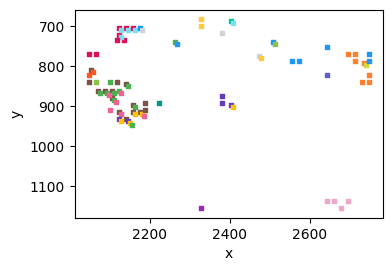

In [303]:
# get channels and their color 
all_channel_pos = []
all_cluster_color= []
all_timestamps = []
# plot channel to time 

# find all the channel positions, number and sort them 
for x in range(len(trackable_units)):
    trackable = trackable_units[x]
    for idx in trackable["indices"]: 
        pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
        clsuter = umap_df_added.loc[idx, "color"]
        col = base.CUSTOM_PAL_SORT_3[clsuter]
        all_channel_pos.append(pos)
        all_cluster_color.append(col)

# make a dict of color and position
channel_color = {}
for i in range(len(all_channel_pos)):
    pos = all_channel_pos[i]
    col = all_cluster_color[i]
    if pos not in channel_color:
        channel_color[pos] = [col]
    else:
        if col not in channel_color[pos]:
            channel_color[pos].append(col)


# plot the channels and color them by cluster 
print(len(channel_color))
# min_x, min_y = np.min(all_channel_pos, axis=0)
# max_x, max_y = np.max(all_channel_pos, axis=0)
# print(min_x, min_y, max_x, max_y)
# print((max_x - min_x)/17.5, (max_y - min_y)/17.5)


# do the plot 
gitter = 5
fig, ax = plt.subplots(1, 1, figsize=(4, 2.7))
for pos, color in channel_color.items():
    if len(color) == 1:
        c = color[0]
        ax.scatter(pos[0], pos[1], c=c, s=10, marker='s', alpha=1)
    else:
        print(f"pos={pos}, color={color}")
        for i in range(len(color)):
            c = color[i]
            ax.scatter(pos[0]+(i+1)*gitter, pos[1]+(i+1)*gitter, c=c, s=10, marker='s', alpha=1)

# set x, y the same aspect 
ax.set_aspect('equal')
ax.set_xlabel("x")
ax.set_ylabel("y")
# reverse the y axis
ax.invert_yaxis()
# plt.savefig(f"{figure_save_to}/figure_4/channels_color_trackable_units.png", dpi=300)
# plt.savefig(f"{figure_save_to}/figure_4/channels_color_trackable_units.pdf", dpi=300)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
print(xmin, xmax, ymin, ymax)

2047.5 682.5 2747.5 1155.0


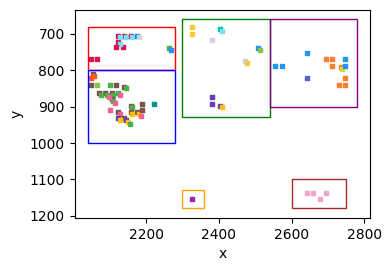

In [111]:
### plot neurons' trajectory in blocks
min_x, min_y = np.min(all_channel_pos, axis=0)
max_x, max_y = np.max(all_channel_pos, axis=0)
print(min_x, min_y, max_x, max_y)
block_1 = [(2040, 680), (2280, 800)]
block_2 = [(2040, 800), (2280, 1000)]
block_3 = [(2300, 660), (2540, 930)]
block_4 = [(2540, 660), (2780, 900)]
block_5 = [(2300, 1130), (2360, 1180)]
block_6 = [(2600, 1100), (2750, 1180)]

blocks = [block_1, block_2, block_3, block_4, block_5, block_6]
block_color = ["red", "blue", "green", "purple", "orange", "brown"]

# do the plot 
gitter = 5
fig, ax = plt.subplots(1, 1, figsize=(4, 2.7))
for pos, color in channel_color.items():
    if len(color) == 1:
        c = color[0]
        ax.scatter(pos[0], pos[1], c=c, s=10, marker='s', alpha=1)
    else:
        # print(f"pos={pos}, color={color}")
        for i in range(len(color)):
            c = color[i]
            ax.scatter(pos[0]+(i+1)*gitter, pos[1]+(i+1)*gitter, c=c, s=10, marker='s', alpha=1)

# plot the blocks
for i in range(len(blocks)):
    block = blocks[i]
    rect = matplotlib.patches.Rectangle(block[0], block[1][0]-block[0][0], block[1][1]-block[0][1], 
                                        linewidth=1, edgecolor=block_color[i], facecolor='none')
    ax.add_patch(rect)

# set x, y the same aspect 
ax.set_aspect('equal')
ax.set_xlabel("x")
ax.set_ylabel("y")
# reverse the y axis
ax.invert_yaxis()


In [116]:
assign_blocks = {i:set() for i in range(len(blocks))}
for x in range(len(trackable_units)):
    trackable = trackable_units[x]
    chn_pos = []
    chn_pos_tuples = []

    for idx in trackable["indices"]: 
        pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
        chn_pos_tuples.append(pos)
    
    chn_pos_tuples = list(set(chn_pos_tuples))
    # print(chn_pos_tuples)
    for chp in chn_pos_tuples:
        for i in range(len(blocks)):
            block = blocks[i]
            if chp[0] >= block[0][0] and chp[0] <= block[1][0] and chp[1] >= block[0][1] and chp[1] <= block[1][1]:
                assign_blocks[i].add(x) 
for i, b in assign_blocks.items():
    assign_blocks[i] = sorted(list(b))
print(assign_blocks)

{0: [4, 9, 19, 24, 26, 33, 35], 1: [6, 12, 13, 14, 15, 17, 18, 21, 32, 34, 36, 37, 38, 41, 42, 43], 2: [3, 5, 11, 20, 22, 27, 29, 30, 39, 40], 3: [0, 1, 8, 10, 16, 23, 25, 28, 31, 44, 45], 4: [2], 5: [7]}


In [124]:
### get min and max timestamp to set the xlim for each block 
### get timestamps from the umaps_df_added
min_ts = umap_df_added["timestamp"].min()
max_ts = umap_df_added["timestamp"].max()
print(min_ts, max_ts)

2023-09-16 17:13:32 2023-09-23 14:03:59


In [138]:
for b, data in assign_blocks.items():
    print(b, len(data))

0 7
1 16
2 10
3 11
4 1
5 1


block 0 channels are [(2047.5, 770.0), (2065.0, 770.0), (2117.5, 700.0), (2117.5, 717.5), (2117.5, 735.0), (2135.0, 700.0), (2135.0, 735.0), (2152.5, 700.0), (2170.0, 700.0), (2257.5, 735.0)]
2 7
2 7
8 8
8 8
0 1
9 9
9 9
block 1 channels are [(2047.5, 805.0), (2047.5, 822.5), (2047.5, 840.0), (2065.0, 840.0), (2065.0, 857.5), (2082.5, 857.5), (2100.0, 840.0), (2100.0, 857.5), (2100.0, 875.0), (2100.0, 910.0), (2117.5, 840.0), (2117.5, 857.5), (2117.5, 910.0), (2117.5, 927.5), (2135.0, 840.0), (2135.0, 927.5), (2152.5, 892.5), (2152.5, 910.0), (2170.0, 910.0), (2187.5, 892.5), (2187.5, 910.0), (2222.5, 892.5)]
14 26
24 32
16 26
32 32
28 28
25 27
20 23
25 30
30 30
12 12
21 24
27 27
17 17
15 15
12 13
33 33
block 2 channels are [(2327.5, 682.5), (2327.5, 700.0), (2380.0, 717.5), (2380.0, 875.0), (2380.0, 892.5), (2397.5, 682.5), (2397.5, 892.5), (2467.5, 770.0), (2502.5, 735.0)]
41 41
43 43
43 43
36 37
39 42
41 41
38 38
42 42
44 44
44 44
block 3 channels are [(2555.0, 787.5), (2572.5, 787.5

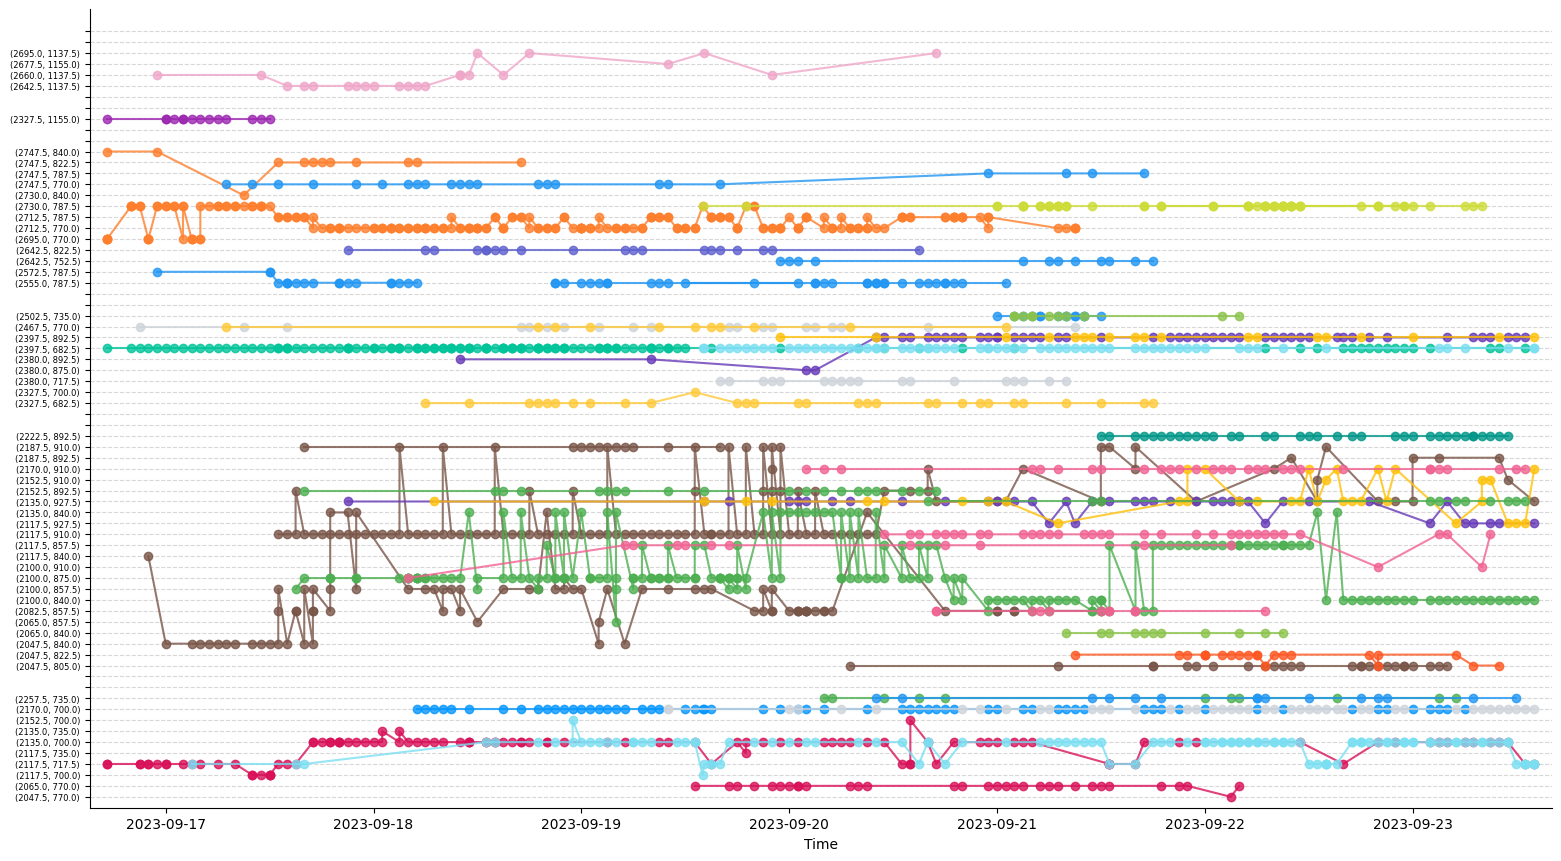

In [194]:
# plot neurons' trajectory in blocks
counter = 0
fig, axs = plt.subplots(1, 1, figsize=(15.5, 8.5), constrained_layout=True)
channel_labels = []
spacing = 2
for b in range(len(assign_blocks)):
    # if b > 0:
    #     continue
    neuron_block = assign_blocks[b]

    all_chn_pos = []
    pos_id_to_channel = {}
    for x in neuron_block:
        trackable = trackable_units[x]
        for idx in trackable["indices"]: 
            pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
            pos_id = chn_pos_dict[pos]
            all_chn_pos.append(pos)

    pos_sorted = list(set(all_chn_pos))
    pos_sorted.sort(key=lambda pos: (pos[0], pos[1]))
    # channel_labels.extend([(str(pos[0]), str(pos[1])) for pos in pos_sorted])
    channel_labels.extend([str(pos) for pos in pos_sorted])
    for s in range(spacing):
        channel_labels.append("")
    print(f"block {b} channels are {pos_sorted}")
    block_len = len(pos_sorted)
    # reset pos_id_sorted to be continous number
    # pos_id_dict = {pos_id: i for i, pos_id in enumerate(pos_id_sorted)}

    for x in neuron_block:
        trackable = trackable_units[x]
        cluster_ids = []
        chn_pos = []
        timestamps = []
        
        for idx in trackable["indices"]: 
            waveform_cluster = umap_df_added.loc[idx, "color"]
            pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
            pos_id = pos_sorted.index(pos)
            timestamp = umap_df_added.iloc[idx]["timestamp"]

            timestamps.append(timestamp)
            cluster_ids.append(base.CUSTOM_PAL_SORT_3[waveform_cluster])
            chn_pos.append(pos_id + counter)
            # all_chn_pos.append(pos_id)
            # if pos_id not in pos_id_to_channel:
            #     pos_id_to_channel[pos_id] = pos

        # chn_pos = np.array(chn_pos)+counter 
        # sort cluster_ids, chn_pos by timestamps
        timestamps, cluster_ids, chn_pos = zip(*sorted(zip(timestamps, cluster_ids, chn_pos)))

        print(min(chn_pos), max(chn_pos))
        axs.plot(timestamps, chn_pos, c=cluster_ids[0], marker='o', linestyle='-', alpha=0.8)

    counter += (block_len + spacing)

axs.grid(axis='y', linestyle='--', alpha=0.5)
# # replace the channel position with the actual channel position
# chn_pos_labels = [pos_id_to_channel[pos] for pos in pos_id_sorted]
# axs.set_ylabel("Channel")
# # turn off y ticks
# # axs.set_yticks([])
axs.set_yticks(np.arange(counter))
axs.set_yticklabels(channel_labels, rotation=0, fontsize=6)
axs.set_ylim(-1, counter+1)
# # remove the top and right spines
sns.despine()
# # plt.tight_layout()

# axs.set_title(f"Trackable Units Trajectory")
axs.set_xlabel("Time")
axs.set_xlim(min_ts-pd.to_timedelta(2, unit='hours'),
            max_ts+pd.to_timedelta(2, unit='hours')
)


plt.savefig(f"{figure_save_to}/figure_4/trackable_unit_trajectory_block_all_no_ytick.png", dpi=300)
plt.savefig(f"{figure_save_to}/figure_4/trackable_unit_trajectory_block_all_no_ytick.pdf", dpi=300)
plt.show(block=False)

In [ ]:
# plot waveform for each trackable unit and color them by cluster 
for b in range(len(assign_blocks)):
    neuron_block = assign_blocks[b]

    for x in neuron_block:
        trackable = trackable_units[x]
        cluster_ids = []
        chn_pos = []
        timestamps = []

        fig1, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
        fig2, axs2 = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
        
        for idx in trackable["indices"]: 
            waveform_cluster = umap_df_added.loc[idx, "color"]
            waveform = umap_df_added.loc[idx, "waveform"]
            neighbor_waveforms = umap_df_added.loc[idx, "neighbor_waveforms"]
            # pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
            # pos_id = pos_sorted.index(pos)
            timestamp = umap_df_added.iloc[idx]["timestamp"]

            timestamps.append(timestamp)
            cluster_ids.append(base.CUSTOM_PAL_SORT_3[waveform_cluster])

            # plot waveform
            axs.plot(waveform, c=base.CUSTOM_PAL_SORT_3[waveform_cluster], linewidth=0.8, alpha=0.7)
            axs2.plot(neighbor_waveforms, c=base.CUSTOM_PAL_SORT_3[waveform_cluster], linewidth=0.8, alpha=0.7)

        # remove spine 
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs2.spines['top'].set_visible(False)
        axs2.spines['right'].set_visible(False)

        axs.set_title(f"Trackable Unit {x}")
        axs2.set_title(f"Trackable Unit {x}")

        fig1.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_waveform_{x}.png", dpi=300)
        fig1.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_waveform_{x}.pdf", dpi=300)
        fig2.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_{x}.png", dpi=300)
        fig2.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_{x}.pdf", dpi=300)
        plt.close()

        

minimum similarity: 0.5395535734368264, max: 0.9997339516706563
{(0.0, 0.02): 0.0, (0.02, 0.04): 0.0, (0.04, 0.06): 0.0, (0.06, 0.08): 0.0, (0.08, 0.1): 0.0, (0.1, 0.12): 0.0, (0.12, 0.14): 0.0, (0.14, 0.16): 0.0, (0.16, 0.18): 0.0, (0.18, 0.2): 0.0, (0.2, 0.22): 0.0, (0.22, 0.24): 0.0, (0.24, 0.26): 0.0, (0.26, 0.28): 0.0, (0.28, 0.3): 0.0, (0.3, 0.32): 0.0, (0.32, 0.34): 0.0, (0.34, 0.36): 0.0, (0.36, 0.38): 0.0, (0.38, 0.4): 0.0, (0.4, 0.42): 0.0, (0.42, 0.44): 0.0, (0.44, 0.46): 0.0, (0.46, 0.48): 0.0, (0.48, 0.5): 0.0, (0.5, 0.52): 0.0, (0.52, 0.54): 0.05425935973955508, (0.54, 0.56): 0.0, (0.56, 0.58): 0.10851871947911015, (0.58, 0.6): 0.05425935973955508, (0.6, 0.62): 0.0, (0.62, 0.64): 0.05425935973955508, (0.64, 0.66): 0.16277807921866522, (0.66, 0.68): 0.16277807921866522, (0.68, 0.7000000000000001): 0.2170374389582203, (0.7000000000000001, 0.72): 0.3798155181768855, (0.72, 0.74): 0.5968529571351058, (0.74, 0.76): 0.6511123168746609, (0.76, 0.78): 0.5425935973955507, (0.78, 0

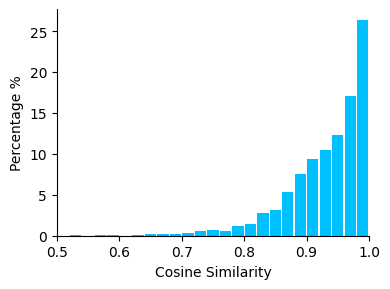

In [285]:
# tracakble units waveform similiarity over time 
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
similarity = []
for trackable in trackable_units:
    all_unit_indices = []
    timestamps = []
    # similarity = []
    for idx in trackable["indices"]:
        all_unit_indices.append(idx)
        timestamp = umap_df_added.loc[idx]["timestamp"]
        timestamps.append(timestamp)

    # sort the indices by timestamp
    timestamps, all_unit_indices= zip(*sorted(zip(timestamps, all_unit_indices)))

    for i in range(len(all_unit_indices)-1):
        idx1 = all_unit_indices[i]
        idx2 = all_unit_indices[i+1] 
        neighbor_waveforms1 = umap_df_added.loc[idx1, "neighbor_waveforms"]
        neighbor_waveforms2 = umap_df_added.loc[idx2, "neighbor_waveforms"]
        sim = cosine_similarity(neighbor_waveforms1.reshape(1, -1), neighbor_waveforms2.reshape(1, -1))[0][0]
        similarity.append(sim)
        # pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
    cluster = umap_df_added.loc[all_unit_indices[0], "color"]
    color  = base.CUSTOM_PAL_SORT_3[cluster]
    # axs.plot(timestamps[:-1], similarity, c=color, linewidth=1,  alpha=0.7)

print(f"minimum similarity: {min(similarity)}, max: {max(similarity)}")
bins = np.linspace(0, 1, 51)  # Define bins (e.g., 0 to 1, 5 bins)
counts, bin_edges = np.histogram(similarity, bins=bins)
percentages = (counts / len(similarity)) * 100
stat_dict = {(bin_edges[i], bin_edges[i+1]):percentages[i] for i in range(len(percentages))}
print(stat_dict)
# print(percentages)
# print(counts)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
axs.bar(bin_centers, percentages, width=np.diff(bin_edges)*0.9, color='deepskyblue', alpha=1, edgecolor=None)

axs.set_xlim(0.5, 1)
axs.set_xlabel("Cosine Similarity")
axs.set_ylabel("Percentage %")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_similarity.png", dpi=300)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_similarity.pdf", dpi=300)
plt.show()

In [287]:
# get the sum of similarity >= 0.9
sum_sim = 0
for k, v in stat_dict.items():
    if k[0] >= 0.9:
        print(f"{k}: {v}")
        sum_sim += v
print(f"sum of similarity >= 0.9: {sum_sim}")

(0.9, 0.92): 9.332609875203472
(0.92, 0.9400000000000001): 10.47205642973413
(0.9400000000000001, 0.96): 12.316874660879002
(0.96, 0.98): 17.037438958220292
(0.98, 1.0): 26.370048833423766
sum of similarity >= 0.9: 75.52902875746067


minimum distance: 0.0, max: 70.0
[ 0. 20. 40. 60. 80.]
{(0.0, 20.0): 88.44275637547477, (20.0, 40.0): 8.084644601193707, (40.0, 60.0): 2.278893109061313, (60.0, 80.0): 1.1937059142702116}


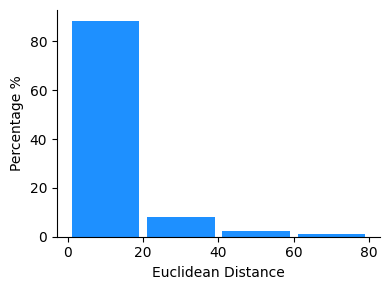

In [293]:
# neighbor distance distribution 
from scipy.spatial.distance import euclidean
fig, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
distances = []
for trackable in trackable_units:
    all_unit_indices = []
    timestamps = []
    # similarity = []
    for idx in trackable["indices"]:
        all_unit_indices.append(idx)
        timestamp = umap_df_added.loc[idx]["timestamp"]
        timestamps.append(timestamp)

    # sort the indices by timestamp
    timestamps, all_unit_indices= zip(*sorted(zip(timestamps, all_unit_indices)))

    for i in range(len(all_unit_indices)-1):
        idx1 = all_unit_indices[i]
        idx2 = all_unit_indices[i+1] 
        pos1 = tuple(umap_df_added.loc[idx1, ["pos_x", "pos_y"]].values)
        pos2 = tuple(umap_df_added.loc[idx2, ["pos_x", "pos_y"]].values)
        distance = euclidean(pos1, pos2)
        distances.append(distance)
        # pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
    cluster = umap_df_added.loc[all_unit_indices[0], "color"]
    color  = base.CUSTOM_PAL_SORT_3[cluster]

print(f"minimum distance: {min(distances)}, max: {max(distances)}")

bins = np.linspace(0, 80, 5)  # Define bins (e.g., 0 to 1, 5 bins)
print(bins)
counts, bin_edges = np.histogram(distances, bins=bins)
percentages = (counts / len(distances)) * 100
stats_dict = {(bin_edges[i], bin_edges[i+1]):percentages[i] for i in range(len(percentages))}
print(stats_dict)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
axs.bar(bin_centers, percentages, width=np.diff(bin_edges)*0.9, color='dodgerblue', alpha=1, edgecolor=None)


# axs.hist(distances, bins=20, color="darkorange", density=True, rwidth=0.9, alpha=1)
# show y axis in percentage
# axs.yaxis.set_major_formatter(PercentFormatter(xmax=100))
# axs.set_xlim(0, 100)
axs.set_xlabel("Euclidean Distance")
axs.set_ylabel("Percentage %")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_distance.png", dpi=300)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_distance.pdf", dpi=300)
plt.show()

minimum number of channels: 1, max: 7
[1. 2. 3. 4. 5. 6. 7. 8.]
{(1.0, 2.0): 60.86956521739131, (2.0, 3.0): 17.391304347826086, (3.0, 4.0): 4.3478260869565215, (4.0, 5.0): 8.695652173913043, (5.0, 6.0): 0.0, (6.0, 7.0): 2.1739130434782608, (7.0, 8.0): 6.521739130434782}


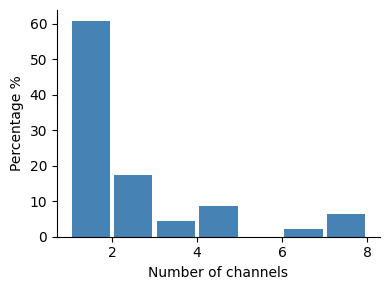

In [294]:
# also plot the number of channels in each trackable unit
chn_numbers = []
for trackable in trackable_units:
    all_chn_pos = []
    for idx in trackable["indices"]: 
        pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
        cluster = umap_df_added.loc[idx, "color"]
        color  = base.CUSTOM_PAL_SORT_3[cluster]
        # pos_id = chn_pos_dict[pos]
        all_chn_pos.append(pos)

    pos_sorted = list(set(all_chn_pos))
    chn_numbers.append(len(pos_sorted))
    
print(f"minimum number of channels: {min(chn_numbers)}, max: {max(chn_numbers)}")
fig, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
bins = np.linspace(1, 8, 8)  # Define bins (e.g., 0 to 1, 5 bins)
print(bins)
counts, bin_edges = np.histogram(chn_numbers, bins=bins)
percentages = (counts / len(chn_numbers)) * 100
stats_dict = {(bin_edges[i], bin_edges[i+1]):percentages[i] for i in range(len(percentages))}
print(stats_dict)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
axs.bar(bin_centers, percentages, width=np.diff(bin_edges)*0.9, color='steelblue', alpha=1, edgecolor=None)


# axs.hist(distances, bins=20, color="darkorange", density=True, rwidth=0.9, alpha=1)
# show y axis in percentage
# axs.yaxis.set_major_formatter(PercentFormatter(xmax=100))
# axs.set_xlim(0, 100)
axs.set_xlabel("Number of channels")
axs.set_ylabel("Percentage %")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_channel_counts.png", dpi=300)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_neighbor_waveform_channel_counts.pdf", dpi=300)
plt.show()


In [295]:
per_ch = 0
for k, v in stats_dict.items():
    if k[0] <= 4:
        print(f"{k}: {v}")
        per_ch += v
    
print(f"percentage of channels <= 4: {per_ch}")

(1.0, 2.0): 60.86956521739131
(2.0, 3.0): 17.391304347826086
(3.0, 4.0): 4.3478260869565215
(4.0, 5.0): 8.695652173913043
percentage of channels <= 4: 91.30434782608697


[111.77444444444444, 47.77444444444444, 18.774722222222223, 163.77444444444444, 164.84083333333334, 108.0, 110.0, 90.0, 30.0, 155.0663888888889, 105.99972222222222, 89.99972222222222, 145.0663888888889, 143.0661111111111, 47.999722222222225, 72.99972222222222, 66.0, 137.0663888888889, 95.0, 121.0, 84.0, 127.06611111111111, 122.99972222222222, 28.0, 100.0663888888889, 36.999722222222225, 62.90111111111111, 96.06611111111111, 81.99972222222222, 40.0, 87.0663888888889, 43.0, 83.0, 73.0, 69.0, 74.0, 70.0, 69.0, 38.0, 12.0, 26.0, 25.00027777777778, 49.0, 47.0, 27.00027777777778, 31.00027777777778]
minimum duration: 12.0, max: 164.84083333333334
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170.]
{(0.0, 10.0): 0.0, (10.0, 20.0): 4.3478260869565215, (20.0, 30.0): 8.695652173913043, (30.0, 40.0): 8.695652173913043, (40.0, 50.0): 13.043478260869565, (50.0, 60.0): 0.0, (60.0, 70.0): 8.695652173913043, (70.0, 80.0): 8.695652173913043, (80.0, 90.0): 10.8695

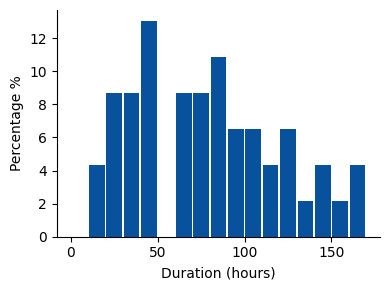

In [296]:
#### duration of the trackable units
durations = []
for trackable in trackable_units:
    duration = trackable["end_time"] - trackable["start_time"]
    durations.append(duration.total_seconds() / 3600)  # Convert to hours
    # print(f"Duration: {duration}")
print(durations)
print(f"minimum duration: {min(durations)}, max: {max(durations)}")

fig, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
bins = np.linspace(0, 160+10, 18)  # Define bins (e.g., 0 to 1, 5 bins)
print(bins)
counts, bin_edges = np.histogram(durations, bins=bins)
percentages = (counts / len(durations)) * 100
stats_dict = {(bin_edges[i], bin_edges[i+1]):percentages[i] for i in range(len(percentages))}
print(stats_dict)
# print(percentages)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
axs.bar(bin_centers, percentages, width=np.diff(bin_edges)*0.9, color='#08519c', alpha=1, edgecolor=None)
axs.set_xlabel("Duration (hours)")
axs.set_ylabel("Percentage %")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_duration_hours.png", dpi=300)
fig.savefig(f"{figure_save_to}/figure_4/waveforms/trackable_unit_duration_hours.pdf", dpi=300)


In [300]:
per_dur = 0
for k, v in stats_dict.items():
    if k[0] >= 60:
        print(f"{k}: {v}")
        per_dur += v
print(f"percentage of duration >= 60 hours: {per_dur}")

(60.0, 70.0): 8.695652173913043
(70.0, 80.0): 8.695652173913043
(80.0, 90.0): 10.869565217391305
(90.0, 100.0): 6.521739130434782
(100.0, 110.0): 6.521739130434782
(110.0, 120.0): 4.3478260869565215
(120.0, 130.0): 6.521739130434782
(130.0, 140.0): 2.1739130434782608
(140.0, 150.0): 4.3478260869565215
(150.0, 160.0): 2.1739130434782608
(160.0, 170.0): 4.3478260869565215
percentage of duration >= 60 hours: 65.21739130434781


Text(0, 0.5, 'Maximum Distance')

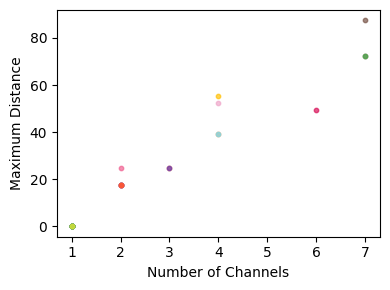

In [202]:
# scatter plot for number of channels and the maximum distance between the channels
fig, axs = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
for trackable in trackable_units:
    all_chn_pos = []
    for idx in trackable["indices"]: 
        pos = tuple(umap_df_added.loc[idx, ["pos_x", "pos_y"]].values)
        cluster = umap_df_added.loc[idx, "color"]
        color  = base.CUSTOM_PAL_SORT_3[cluster]
        # pos_id = chn_pos_dict[pos]
        all_chn_pos.append(pos)

    pos_sorted = list(set(all_chn_pos))
    pos_sorted.sort(key=lambda pos: (pos[0], pos[1]))
    num_chn = len(pos_sorted)
    max_distance = 0
    for i in range(num_chn):
        for j in range(i+1, num_chn):
            distance = np.sqrt((pos_sorted[i][0] - pos_sorted[j][0])**2 + (pos_sorted[i][1] - pos_sorted[j][1])**2)
            if distance > max_distance:
                max_distance = distance
    axs.scatter(num_chn, max_distance, c=color, s=10, alpha=0.7)
axs.set_xlabel("Number of Channels")
axs.set_ylabel("Maximum Distance")

    